In [1]:
import keras
from keras.datasets import mnist

In [2]:
(xtrain , ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape, xtest.shape, ytrain.shape

((60000, 28, 28), (10000, 28, 28), (60000,))

In [4]:
import matplotlib.pyplot as plt

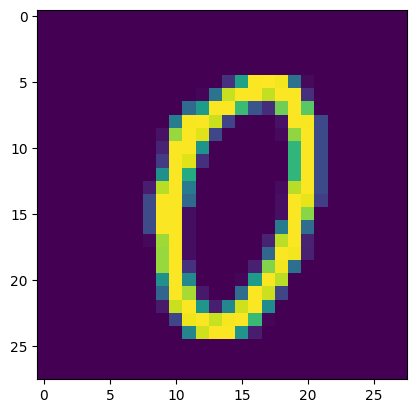

In [5]:
plt.imshow(xtrain[1000])

In [6]:
print(ytrain[10])

3


In [7]:
xtrain = xtrain/255

In [8]:
xtest = xtest/255

In [9]:
import numpy as np

In [10]:
xtrain_reshaped = np.reshape(xtrain, (60000 , 28*28))

In [11]:
xtest_reshaped= np.reshape(xtest, (10000 , 28*28))

In [12]:
xtest_reshaped.shape

(10000, 784)

In [13]:
from keras.models import Sequential

In [14]:
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy

In [15]:
model = Sequential()
model.add(Dense(64, activation= 'relu', input_shape= (28*28,)))
model.add(Dense(32 ,  activation = 'relu'))
model.add(Dense(8 ,  activation = 'relu'))
model.add(Dense(10 ,  activation = 'softmax'))

model.compile(optimizer = "adam", loss= SparseCategoricalCrossentropy(), metrics = ["accuracy"])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 52,674
Trainable params: 52,674
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(xtrain_reshaped, ytrain, batch_size = 16, epochs= 10 )

Epoch 1/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0332 - accuracy: 0.9891
Epoch 2/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0316 - accuracy: 0.9897
Epoch 3/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 4/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0270 - accuracy: 0.9912
Epoch 5/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0251 - accuracy: 0.9918
Epoch 6/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0258 - accuracy: 0.9912
Epoch 7/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0213 - accuracy: 0.9930
Epoch 8/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0197 - accuracy: 0.9931
Epoch 9/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0185 - accuracy: 0.9940
Epoch 10/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.018

In [34]:
model.evaluate(xtest_reshaped, ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9763


[0.12784089148044586, 0.9763000011444092]

In [29]:
model.history.history

{'loss': [0.033247873187065125,
  0.03159032016992569,
  0.028277121484279633,
  0.027024604380130768,
  0.025070641189813614,
  0.02582453191280365,
  0.02131551317870617,
  0.019731495529413223,
  0.018524156883358955,
  0.01810114085674286],
 'accuracy': [0.9891499876976013,
  0.9896833300590515,
  0.9908999800682068,
  0.9911500215530396,
  0.9918166399002075,
  0.9911999702453613,
  0.992983341217041,
  0.9931166768074036,
  0.9940166473388672,
  0.9941999912261963]}

In [30]:
print(model.history.history.keys())


dict_keys(['loss', 'accuracy'])


In [31]:
import seaborn as sns

<Axes: >

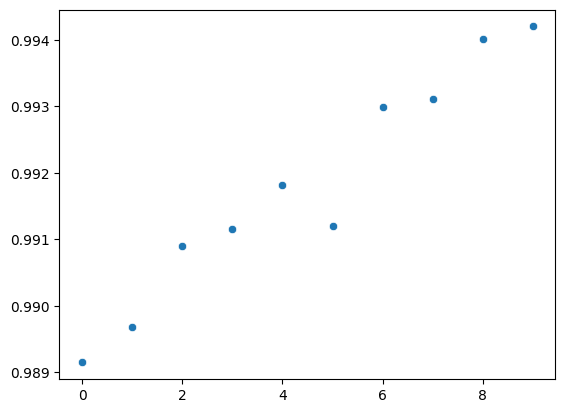

In [32]:
X = [i for i in range(10)]
sns.scatterplot(x = X, y= model.history.history['accuracy'])


<Axes: >

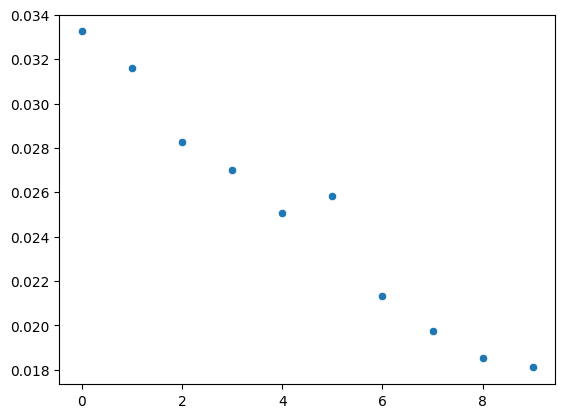

In [33]:
sns.scatterplot(x=X, y=model.history.history['loss'])
